<a href="https://colab.research.google.com/github/sjd1365/learn/blob/main/Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()



Saving Disease_clean.xlsx to Disease_clean.xlsx


In [7]:
list = pd.read_excel('Disease_clean.xlsx')
list.head()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,1,1,1,2,3,1,1,0
1,5,4,4,5,7,3,2,1,0
2,3,1,1,1,2,3,1,1,0
3,6,8,8,1,3,3,7,1,0
4,4,1,1,3,2,3,1,1,0


## Data Undertanding


In [9]:
list.shape

(699, 9)

In [10]:
list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump_thickness              699 non-null    int64
 1   Uniformity_Cell_Size         699 non-null    int64
 2   Uniformity_Cell_Shape        699 non-null    int64
 3   Marginal_Adhesion            699 non-null    int64
 4   Single_Epithelial_Cell_Size  699 non-null    int64
 5   Bland_Chromatin              699 non-null    int64
 6   Normal_Nucleoli              699 non-null    int64
 7   Mitoses                      699 non-null    int64
 8   Class                        699 non-null    int64
dtypes: int64(9)
memory usage: 49.3 KB


In [11]:
np.sum(list.isnull(), axis = 0)

,0
Clump_thickness,0
Uniformity_Cell_Size,0
Uniformity_Cell_Shape,0
Marginal_Adhesion,0
Single_Epithelial_Cell_Size,0
Bland_Chromatin,0
Normal_Nucleoli,0
Mitoses,0
Class,0


In [18]:
np.sum(list.duplicated())

np.int64(258)

In [23]:
list.drop_duplicates(inplace=True)

In [26]:
list.describe()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
count,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000
mean,5.476190,4.333333,4.396825,3.820862,3.936508,4.283447,3.941043,1.929705,0.539683
std,2.842854,3.238967,3.115050,3.173344,2.467158,2.647284,3.410701,2.083933,0.498989
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,3.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000
50%,5.000000,3.000000,4.000000,3.000000,3.000000,3.000000,2.000000,1.000000,1.000000
75%,8.000000,7.000000,7.000000,6.000000,5.000000,7.000000,7.000000,2.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


In [27]:
X = list.drop(['Class'], axis=1)
y = list['Class']
X = list.iloc[:, :-1]
y = list.iloc[:, -1]

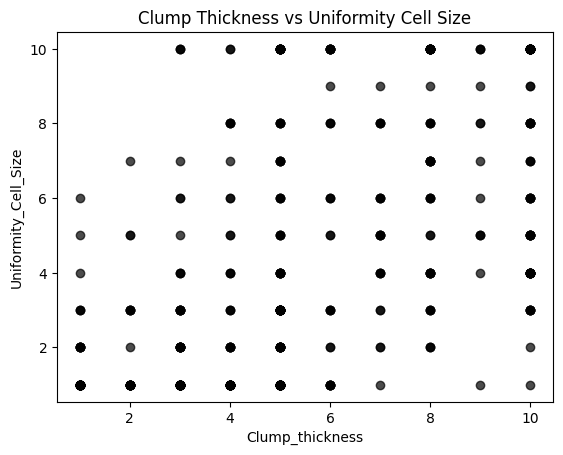

In [28]:
# Use the existing dataframe 'list' and valid numeric columns for plotting
plt.scatter(list['Clump_thickness'], list['Uniformity_Cell_Size'], c='black', alpha=0.7)
plt.xlabel('Clump_thickness')
plt.ylabel('Uniformity_Cell_Size')
plt.title('Clump Thickness vs Uniformity Cell Size')
plt.show()

In [29]:
X.head()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,5,1,1,1,2,3,1,1
1,5,4,4,5,7,3,2,1
2,3,1,1,1,2,3,1,1
3,6,8,8,1,3,3,7,1
4,4,1,1,3,2,3,1,1


In [30]:
# split data into training set and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [31]:
print('Type X is: ',type(X))
print('Type y is: ',type(y))

Type X is:  <class 'pandas.core.frame.DataFrame'>
Type y is:  <class 'pandas.core.series.Series'>


In [32]:
X_train.head()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bland_Chromatin,Normal_Nucleoli,Mitoses
430,1,3,1,1,2,2,2,1
458,5,1,2,1,2,1,1,1
333,5,4,6,6,4,4,3,1
285,8,10,10,10,8,10,7,3
152,10,10,8,6,4,8,10,1


##  Preprocessing – Scaling the features

In [33]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))

X_train_scaled = scaler.fit_transform(X_train)
X_train        = pd.DataFrame(X_train_scaled)

X_test_scaled  = scaler.fit_transform(X_test)
X_test         = pd.DataFrame(X_test_scaled)

In [34]:
X_train


,0,1,2,3,4,5,6,7
0,0.000000,0.222222,0.000000,0.000000,0.111111,0.111111,0.111111,0.000000
1,0.444444,0.000000,0.111111,0.000000,0.111111,0.000000,0.000000,0.000000
2,0.444444,0.333333,0.555556,0.555556,0.333333,0.333333,0.222222,0.000000
3,0.777778,1.000000,1.000000,1.000000,0.777778,1.000000,0.666667,0.222222
4,1.000000,1.000000,0.777778,0.555556,0.333333,0.777778,1.000000,0.000000
...,...,...,...,...,...,...,...,...
303,0.333333,0.111111,0.222222,0.444444,0.222222,0.666667,0.555556,0.000000
304,0.333333,0.000000,0.000000,0.111111,0.111111,0.111111,0.000000,0.000000
305,0.444444,0.222222,0.111111,0.777778,0.444444,0.777778,0.000000,0.111111
306,0.000000,0.000000,0.000000,0.000000,0.444444,0.222222,0.000000,0.000000


##  Fit & Predict the Model and check the error rate for different K Values

In [35]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from math import sqrt
import matplotlib.pyplot as plt

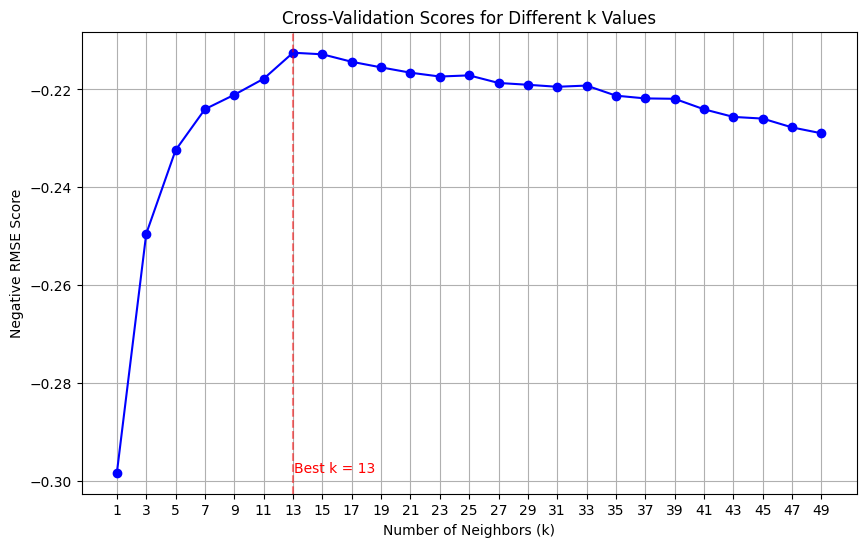

Best k value: 13 with score: -0.21248716981830848


In [37]:
from sklearn.model_selection import cross_val_score

k = [i for i in range(1, 50,2)]  # Example: testing k from 1 to 49 with stepsize 2

# Initialize dictionary to store CV scores
CV = {}

# Loop through each k value
for i in k:  # Start from 1 instead of 0
    KNN = KNeighborsRegressor(n_neighbors=i, weights='uniform', metric='minkowski', p=2)

    # K-fold cross validation
    scores = cross_val_score(estimator=KNN, X=X_train, y=y_train,
                            scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)

    # Calculate the average scores and save the results
    CV[i] = scores.mean()

# Convert CV dictionary to lists for plotting
k_values = [key for key in CV.keys()]
cv_scores = [value for value in CV.values()]

# Plot the CV scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_scores, marker='o', linestyle='-', color='blue')
plt.title('Cross-Validation Scores for Different k Values')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Negative RMSE Score')
plt.grid(True)
plt.xticks(k_values)

# Find and mark the best k value
best_k = k_values[np.argmax(cv_scores)]
plt.axvline(x=best_k, color='red', linestyle='--', alpha=0.5)
plt.text(best_k+0.1, min(cv_scores), f'Best k = {best_k}', color='red')

plt.show()

print(f"Best k value: {best_k} with score: {CV[best_k]}")

In [38]:
cv_scores


[np.float64(-0.2983189075185561),
 np.float64(-0.24948618806151704),
 np.float64(-0.232398173210045),
 np.float64(-0.22402422478530765),
 np.float64(-0.22108253112031484),
 np.float64(-0.21780889724356295),
 np.float64(-0.21248716981830848),
 np.float64(-0.21280995084634569),
 np.float64(-0.21433952779991458),
 np.float64(-0.2154817850119466),
 np.float64(-0.2165670902193897),
 np.float64(-0.21735207068957027),
 np.float64(-0.21711667231637238),
 np.float64(-0.21866510602545658),
 np.float64(-0.21903733933411793),
 np.float64(-0.21944633571250308),
 np.float64(-0.21920185548200477),
 np.float64(-0.22126197696390987),
 np.float64(-0.22182516442742378),
 np.float64(-0.22190245519814908),
 np.float64(-0.22404928990492684),
 np.float64(-0.22560376809158367),
 np.float64(-0.22594751414900527),
 np.float64(-0.22775041015085828),
 np.float64(-0.22895185577418706)]

In [39]:
np.argmax(cv_scores)

np.int64(6)

In [40]:
k_values[8]

17

## Build KNN model for regression

In [41]:
# Build KNN regressor
KNN = KNeighborsRegressor(n_neighbors=best_k,weights = 'uniform',metric = 'minkowski',p=2)

# Fit the model on train
KNN.fit(X_train, y_train)

# Predict test data
Test_Prediction=KNN.predict(X_test)

In [42]:
Results = pd.DataFrame({'MSE': metrics.mean_squared_error(y_test, Test_Prediction),
                        'RMSE': np.sqrt(metrics.mean_squared_error(y_test, Test_Prediction)),
                        'MAPE': metrics.mean_absolute_percentage_error(y_test, Test_Prediction),
                        'MAE' : metrics.mean_absolute_error(y_test, Test_Prediction),
                        'R^2' : metrics.r2_score(y_test, Test_Prediction)},
                       index = ['KNN - K-fold'])
Results

,MSE,RMSE,MAPE,MAE,R^2
KNN - K-fold,0.069849,0.26429,1.667035e+14,0.115674,0.720461


##  Implementing GridsearchCV

In [46]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': [i for i in range(1, 50, 2)],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn = KNeighborsRegressor()

model1 = GridSearchCV(knn, param_grid, cv=5)
model1.fit(X_train, y_train)
model1.best_params_

{'metric': 'euclidean', 'n_neighbors': 13, 'weights': 'uniform'}

In [47]:
KNN2 = KNeighborsRegressor(n_neighbors=model1.best_params_['n_neighbors'],
                          metric=model1.best_params_['metric'],
                          weights=model1.best_params_['weights'])

KNN2.fit(X_train, y_train)

Test_prediction=KNN2.predict(X_test)

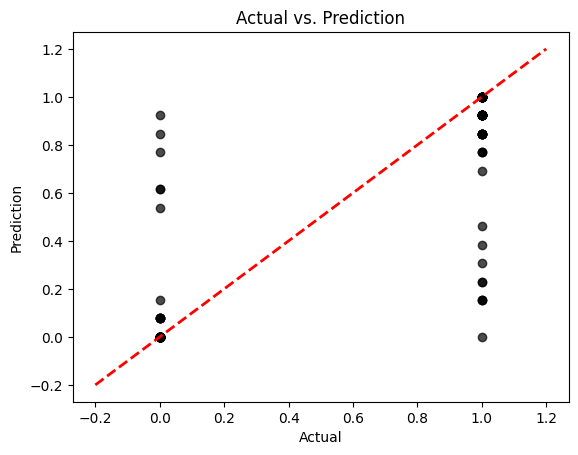

In [48]:
#Plot actual vs. prediction - Test
plt.scatter(y_test, Test_prediction, c = 'black', alpha = 0.7)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Actual vs. Prediction')
xp = np.linspace(y_test.min() - 0.2, y_test.max() + 0.2, 100)
plt.plot(xp, xp, c = 'red', linewidth = 2, linestyle='--')
plt.show()

In [51]:
list.dtypes

,0
Clump_thickness,int64
Uniformity_Cell_Size,int64
Uniformity_Cell_Shape,int64
Marginal_Adhesion,int64
Single_Epithelial_Cell_Size,int64
Bland_Chromatin,int64
Normal_Nucleoli,int64
Mitoses,int64
Class,int64


In [53]:
# list['Bare_Nuclei'].fillna(method='ffill', inplace=True)

In [54]:
list.dtypes

,0
Clump_thickness,int64
Uniformity_Cell_Size,int64
Uniformity_Cell_Shape,int64
Marginal_Adhesion,int64
Single_Epithelial_Cell_Size,int64
Bland_Chromatin,int64
Normal_Nucleoli,int64
Mitoses,int64
Class,int64


In [58]:
# Ensure the column is numeric (non-numeric -> NaN)
# list['Bare_Nuclei'] = pd.to_numeric(list['Bare_Nuclei'], errors='coerce')

# # Compute median (skipna=True). If median is NaN (e.g. column all NaN), try mode, otherwise use 0 as fallback.
# median_val = list['Bare_Nuclei'].median(skipna=True)
# if np.isnan(median_val):
# 	if list['Bare_Nuclei'].mode().size > 0:
# 		median_val = list['Bare_Nuclei'].mode()[0]
# 	else:
# 		median_val = 0

# # Fill NaNs with the determined value and convert to integer safely
# list['Bare_Nuclei'] = list['Bare_Nuclei'].fillna(median_val).astype(int)

In [59]:
# split data into training set and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [60]:
# Build KNN regressor
KNN = KNeighborsRegressor(n_neighbors=3,weights = 'uniform',metric = 'minkowski',p=2)

# Fit the model on train
KNN.fit(X_train, y_train)

# Predict train data
Train_prediction=KNN.predict(X_train)

## EDA

### Univariate Analysis

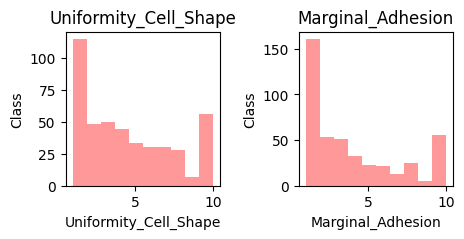

In [62]:
Numeric_features = [2, 3]

plt.figure(figsize = (5, 2))
plt.subplots_adjust(hspace = 0.5, wspace = 0.51)

for i in range(1, len(Numeric_features)+1):
    plt.subplot(1, 2, i)
    plt.hist(x = list.iloc[: , Numeric_features[i - 1]], alpha = 0.4, color = 'red')
    plt.title(list.columns[Numeric_features[i - 1]])
    plt.xlabel(list.columns[Numeric_features[i - 1]])
    plt.ylabel("Class")
plt.show()

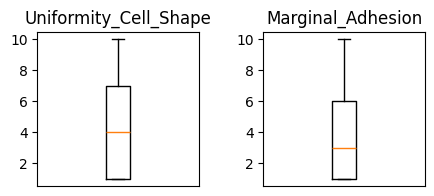

In [63]:
#Boxplot of numeric variables
plt.figure(figsize = (5, 2))
plt.subplots_adjust(hspace = 0.4, wspace = 0.4)

for i in range(1, len(Numeric_features)+1):
    plt.subplot(1, 2, i)
    plt.boxplot(list.iloc[: , Numeric_features[i - 1]])
    plt.xticks([]) #remove the xticks
    plt.title(list.columns[Numeric_features[i - 1]])

plt.show()

In [65]:
list['Class'].value_counts()

,count
Class,
1,238
0,203


### Bivariate Analysis

In [66]:
#Correlation analysis
round(list.iloc[:, Numeric_features].corr(method = 'pearson'), 2)

,Uniformity_Cell_Shape,Marginal_Adhesion
Uniformity_Cell_Shape,1.0,0.6
Marginal_Adhesion,0.6,1.0


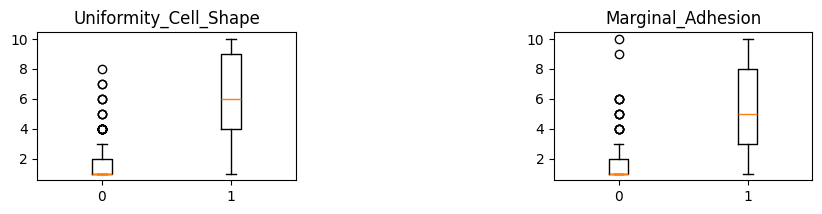

In [68]:
plt.figure(figsize = (10, 10))
plt.subplots_adjust(hspace = 0.4, wspace = 1)

for i in range(1, len(Numeric_features)+1):
    plt.subplot(4, 2, i)
    plt.boxplot([list.loc[list['Class'] == 0, list.columns[Numeric_features[i - 1]]],
                 list.loc[list['Class'] == 1, list.columns[Numeric_features[i - 1]]]])
    plt.title(list.columns[Numeric_features[i - 1]])
    plt.xticks(ticks = [1, 2], labels = ['0', '1'])

plt.show()

## Data preparation

In [69]:
#Split data into test and train

from sklearn.model_selection import train_test_split

train, test = train_test_split(list, test_size = 0.3, random_state = 1234)
print(f"Train shape: {train.shape}")
print(f"Test  shape: {test.shape}")

Train shape: (308, 9)
Test  shape: (133, 9)


In [70]:
list.columns

Index(['Clump_thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape',
       'Marginal_Adhesion', 'Single_Epithelial_Cell_Size', 'Bland_Chromatin',
       'Normal_Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [81]:
# Define dummy variables for catogirical features in train set
# This code block was problematic as 'Bland_Chromatin' is treated as numerical, not categorical
# dummy_ = pd.get_dummies(train[['Bland_Chromatin']],
#                         drop_first=True
# )

# dummy_.info()


In [82]:
# Define X train - selecting all features except 'Class'
X_train = train.drop('Class', axis = 1)

X_train.head()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bland_Chromatin,Normal_Nucleoli,Mitoses
37,6,2,1,1,1,7,1,1
378,3,1,1,4,3,2,2,1
59,9,5,5,2,2,5,1,1
302,10,10,10,7,9,7,10,10
582,6,10,5,5,4,6,10,1


In [76]:
#Define y train (response)

y_train = train['Class']
y_train

,Class
37,0
378,0
59,1
302,1
582,1
...,...
267,1
58,1
413,0
282,1


In [83]:
# Define dummy variables for catogirical features in test set
# This code block was problematic and unnecessary
# dummy_2 = pd.get_dummies(test[['Class']],
#                          drop_first=True
# )

# dummy_2.info()

In [84]:
# Define X test - selecting all features except 'Class'
X_test = test.drop('Class', axis = 1)

X_test.head()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bland_Chromatin,Normal_Nucleoli,Mitoses
505,3,3,1,1,2,1,1,1
32,10,7,7,3,8,7,4,3
227,8,9,9,5,3,7,7,1
158,1,1,2,1,3,1,1,1
584,5,1,1,6,3,1,1,1


In [79]:
#Define y test (response)

y_test = test['Class']
y_test

,Class
505,0
32,1
227,1
158,0
584,0
...,...
288,1
362,0
675,0
117,1


## SVM for classification

In [86]:
# Scaling data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [87]:
from sklearn.svm import SVC

Model_1 = SVC(kernel="linear", random_state=0)
Model_1.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)